In [1]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from utils import compute_trade_sign

events = pd.read_parquet("../fbd/data/clean/intraday/SPY.P_2010.parquet")
events.set_index("index",inplace=True)

## we may need to collapse trades with exactly the same (bid,ask,trade price) together to reduce computational load and make things easier
## often these trade are a result of one big trade being chunked

# available one liner to aggregate trades
#! events =  events.groupby(["bid","ask","trade.price"])["trade.volume"].aggregate(["idxmin","sum"]).reset_index().rename(columns={"sum":"trade.volume"})


events= compute_trade_sign(events)


Percentage of unclassifiable trades 13.71%


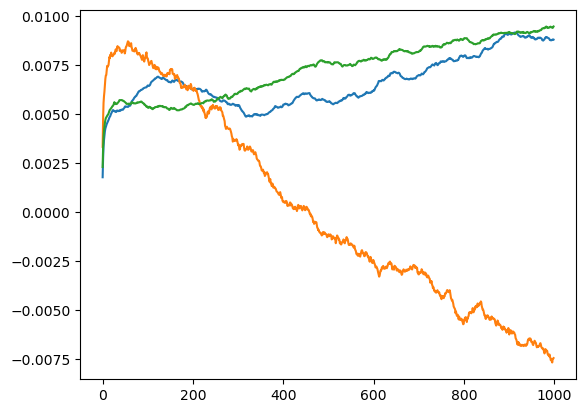

In [3]:
from utils import compute_R

date05=pd.Timestamp(2010,5,5)
date06=pd.Timestamp(2010,5,6)
date07=pd.Timestamp(2010,5,7)

events_05=events[events.index.date==date05.date()]
events_06=events[events.index.date==date06.date()]
events_07=events[events.index.date==date07.date()]

R_05=compute_R(events_05)
R_06=compute_R(events_06)
R_07=compute_R(events_07)

plt.plot(R_05,label="05")
plt.plot(R_06,label="06")
plt.plot(R_07,label="07")
plt.show()

<AxesSubplot:>

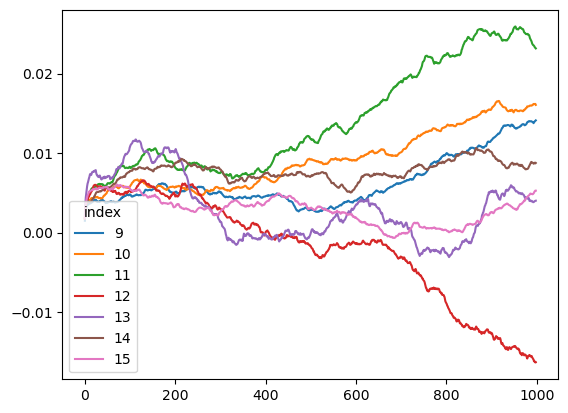

In [4]:
R_05_hour=events_05[["s","mid"]].groupby(events_05.index.hour).apply(compute_R)
pd.pivot_table(R_05_hour.apply(pd.Series),columns=R_05_hour.index).plot()